## What is The Best Neighborhood in Pittsburgh?

For this project, we were told to find the best neighborhood in Pittsburgh. In order to do this, we were to choose a metric of measurement. We chose arguably the most important aspect when choosing a place to live, which is safety. 

![Gif](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWpkbjZyejJiYTAwbHd0eWozdHVwMGF2eGkzY2ppbW10MjUyOTVscCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/XtX936H4lzr5fUgJOR/giphy.gif)

The first metric we chose to use was involving Covid. Since Covid is such a big part of todays society, we figured that the safest neighborhood should have the lowest Covid infections. 

 # My section of safety in Pittsburgh involves the covid virus. 


The Covid virus was a serious problem in recent years. It spread like a wildfire throughout much of the United States, especially bigger cities. The model below shows Covid statistics up until May 15, 2023. 

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

In [2]:
covid = pd.read_csv('BI-Covid.csv')

In [3]:
query_mask = covid['neighborhood_municipality'].str.endswith(" (Pittsburgh)")
query_mask.head(20)

0     False
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14    False
15     True
16    False
17    False
18    False
19    False
Name: neighborhood_municipality, dtype: bool

In [4]:
covid=covid[query_mask]
covid.head(20)

,_id,neighborhood_municipality,infections,reinfections,deaths,hospitalizations,pcr_tests,positive_pcr_tests,update_date
1,92171,Allegheny Center (Pittsburgh),1703,195,5,19,3137,414,2023-05-15
2,92172,Allegheny West (Pittsburgh),524,76,0,5,1136,119,2023-05-15
3,92173,Allentown (Pittsburgh),3529,583,2,40,5171,679,2023-05-15
4,92174,Arlington (Pittsburgh),2607,397,9,36,4062,502,2023-05-15
5,92175,Arlington Heights (Pittsburgh),216,16,3,4,579,44,2023-05-15
10,92180,Banksville (Pittsburgh),6287,817,21,45,8689,1140,2023-05-15
11,92181,Bedford Dwellings (Pittsburgh),1613,286,6,43,2662,408,2023-05-15
12,92182,Beechview (Pittsburgh),10111,1085,19,99,16287,2119,2023-05-15
15,92185,Beltzhoover (Pittsburgh),2265,386,5,53,3417,512,2023-05-15
20,92190,Bloomfield (Pittsburgh),12672,1307,11,79,26565,2446,2023-05-15


In [5]:
covid["neighborhood"] = covid["neighborhood_municipality"].str.removesuffix(" (Pittsburgh)")

In [6]:
covid.loc[:,"neighborhood_municipality":"infections"]

,neighborhood_municipality,infections
1,Allegheny Center (Pittsburgh),1703
2,Allegheny West (Pittsburgh),524
3,Allentown (Pittsburgh),3529
4,Arlington (Pittsburgh),2607
5,Arlington Heights (Pittsburgh),216
...,...,...
201,Upper Lawrenceville (Pittsburgh),3814
208,West End (Pittsburgh),278
211,West Oakland (Pittsburgh),5161
213,Westwood (Pittsburgh),4162


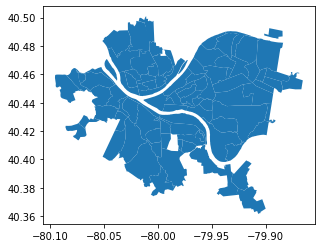

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_-Copy1.shp") 
neighborhoods.plot()

In [8]:
covid_map = neighborhoods.merge(covid, how='left', left_on='hood', right_on='neighborhood')
covid_map[['hood','infections','geometry']].head()

,hood,infections,geometry
0,Central Oakland,6283.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,9579.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5161.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3700.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,3147.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


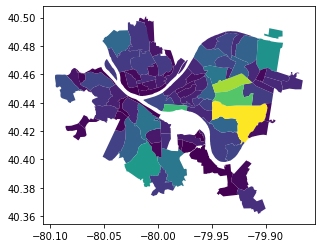

In [9]:
covid_map.plot(column='infections')

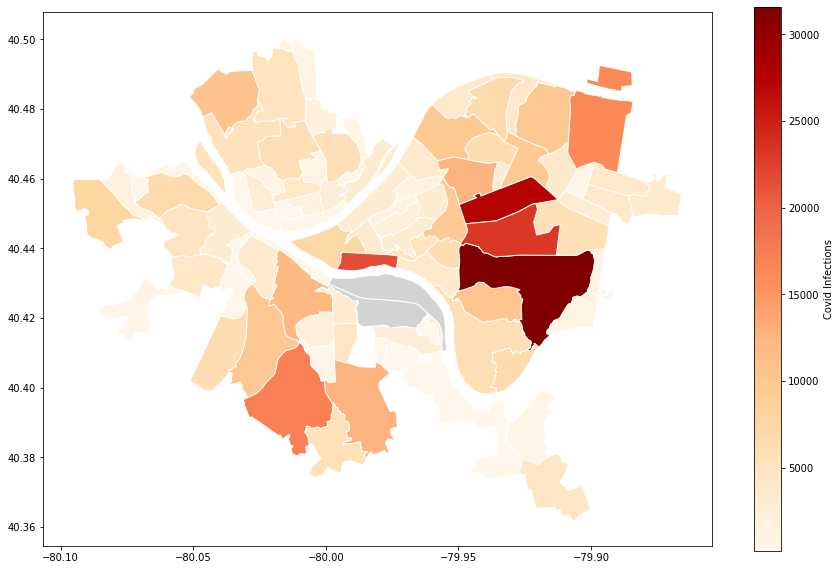

In [10]:
covid_map.plot(column='infections', 
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Covid Infections"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )